In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving stores_expl.csv to stores_expl.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
df = pd.read_csv('stores_expl.csv', delimiter =';') 

In [ ]:
df.head()

,priority,merchant_type,comercial_rating,platform,start_deployment,end_deployment,days_amount
0,Medium,Supermarket,Local Hero,Platform1,13/04/2023,27/04/2023,14
1,Low,Pharmacy,Long Tail,Platform2,13/04/2023,03/05/2023,20
2,Low,Petshop,Long Tail,Platform2,13/04/2023,03/05/2023,20
3,Medium,Supermarket,Local Hero,Platform2,11/04/2023,24/04/2023,13
4,Critical,Supermarket,Regional Key Account,Platform2,13/04/2023,19/04/2023,6


In [ ]:
df.describe()

,days_amount
count,195.000000
mean,11.574359
std,6.684985
min,0.000000
25%,7.000000
50%,10.000000
75%,15.000000
max,35.000000


<Axes: xlabel='priority', ylabel='days_amount'>

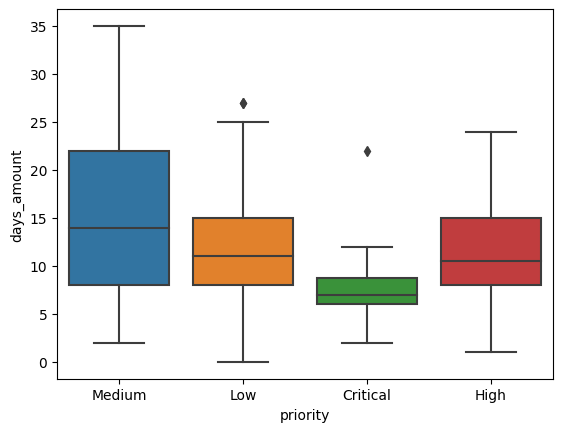

In [ ]:
sns.boxplot(x='priority',y='days_amount',data=df)

<Axes: xlabel='platform', ylabel='days_amount'>

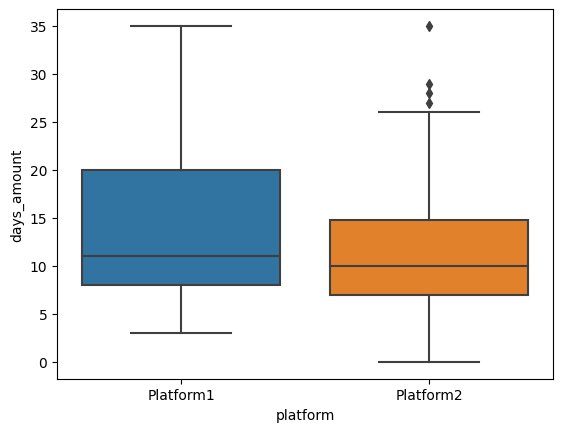

In [ ]:
sns.boxplot(x='platform',y='days_amount',data=df)

In [ ]:
df_temp = df[['priority','platform','days_amount']]
df_group = df_temp.groupby(['priority','platform'],as_index=False).mean()
display(df_group)

,priority,platform,days_amount
0,Critical,Platform1,9.000000
1,Critical,Platform2,6.413793
2,High,Platform2,11.785714
3,Low,Platform1,19.500000
4,Low,Platform2,11.675676
5,Medium,Platform1,19.700000
6,Medium,Platform2,14.360000


In [ ]:
df_temp = df[['comercial_rating','merchant_type','platform','days_amount',]]
df_group = df_temp.groupby(['comercial_rating','merchant_type','platform'],as_index=False).mean()
display(df_group)

,comercial_rating,merchant_type,platform,days_amount
0,Key Account,Petshop,Platform2,7.000000
1,Key Account,Pharmacy,Platform2,14.181818
2,Key Account,Supermarket,Platform2,7.583333
3,Key Account National,Petshop,Platform2,6.500000
4,Key Account National,Pharmacy,Platform2,12.363636
5,Key Account National,Supermarket,Platform2,6.500000
6,Local Hero,Petshop,Platform2,20.000000
7,Local Hero,Pharmacy,Platform2,8.333333
8,Local Hero,Supermarket,Platform1,19.700000
9,Local Hero,Supermarket,Platform2,14.583333


In [ ]:
df = pd.get_dummies(df, columns=['merchant_type', 'comercial_rating'])

In [ ]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,days_amount,merchant_type_Petshop,merchant_type_Pharmacy,merchant_type_Supermarket,comercial_rating_Key Account,comercial_rating_Key Account National,comercial_rating_Local Hero,comercial_rating_Long Tail,comercial_rating_Regional Key Account
days_amount,1.000000,-0.111250,0.039336,0.036547,-0.055681,-0.033525,0.295472,-0.044266,-0.193182
merchant_type_Petshop,-0.111250,1.000000,-0.393445,-0.286972,-0.096974,0.004428,-0.149938,0.229590,-0.069539
merchant_type_Pharmacy,0.039336,-0.393445,1.000000,-0.767772,-0.040839,0.127355,-0.427049,0.264381,0.048012
merchant_type_Supermarket,0.036547,-0.286972,-0.767772,1.000000,0.110138,-0.135787,0.549471,-0.435487,-0.001563
comercial_rating_Key Account,-0.055681,-0.096974,-0.040839,0.110138,1.000000,-0.108148,-0.184310,-0.346844,-0.153401
comercial_rating_Key Account National,-0.033525,0.004428,0.127355,-0.135787,-0.108148,1.000000,-0.142021,-0.267261,-0.118203
comercial_rating_Local Hero,0.295472,-0.149938,-0.427049,0.549471,-0.184310,-0.142021,1.000000,-0.455479,-0.201448
comercial_rating_Long Tail,-0.044266,0.229590,0.264381,-0.435487,-0.346844,-0.267261,-0.455479,1.000000,-0.379094
comercial_rating_Regional Key Account,-0.193182,-0.069539,0.048012,-0.001563,-0.153401,-0.118203,-0.201448,-0.379094,1.000000


<ipython-input-12-5927c2bf1f17>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


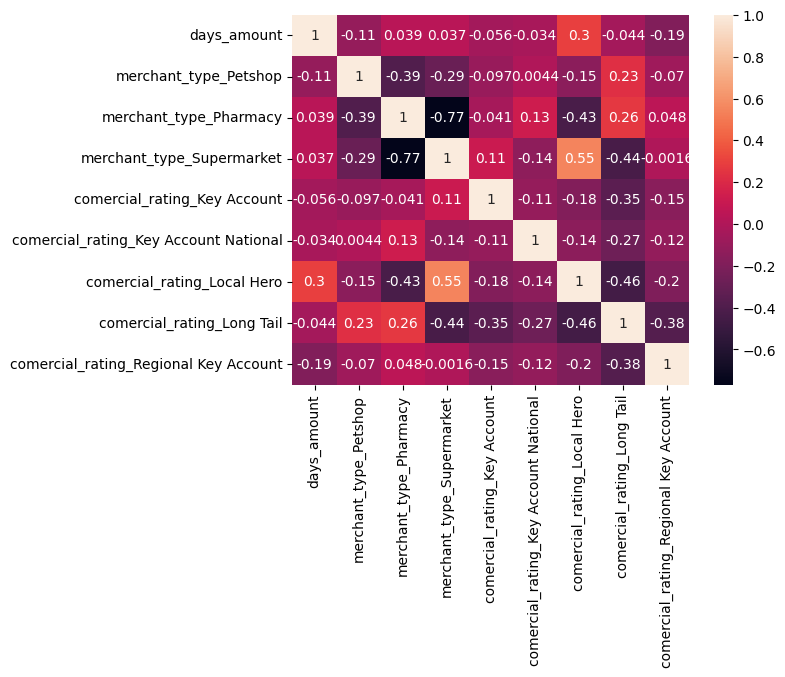

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()